In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [43]:
SQL_PATH = 'queries.sql'

# Database connection parameters
DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': '1040',  # Change this to your password
    'database': 'walmart_dw'
}

In [44]:
# Establish database connection
conn = mysql.connector.connect(**DB_CONFIG)
print("Database connection established successfully!")   

Database connection established successfully!


# Walmart Data Warehouse - Data Visualization
## Running all 20 OLAP queries with visualizations

This notebook executes all queries from queries.sql and creates appropriate visualizations for each.

In [45]:
def parse_queries(sql_file):
    """Parse SQL file and extract individual queries"""
    with open(sql_file, 'r', encoding='utf-8') as f:
        content = f.read()
    
    queries = []
    current_query = ""
    current_comment = ""
    
    lines = content.split('\n')
    for line in lines:
        line = line.strip()
        if line.startswith('--'):
            # Save previous query if exists
            if current_query.strip():
                queries.append({
                    'comment': current_comment.strip(),
                    'query': current_query.strip()
                })
            current_comment = line[2:].strip()
            current_query = ""
        elif line and not line.startswith('--'):
            current_query += line + " "
    
    # Add last query
    if current_query.strip():
        queries.append({
            'comment': current_comment.strip(),
            'query': current_query.strip()
        })
    
    return queries

def execute_query(query_text):
    """Execute a single SQL query and return DataFrame"""
    try:
        cur = conn.cursor(dictionary=True)
        cur.execute(query_text)
        results = cur.fetchall()
        cur.close()
        return pd.DataFrame(results)
    except Exception as e:
        print(f"Error executing query: {e}")
        return pd.DataFrame()

# Parse all queries
all_queries = parse_queries(SQL_PATH)
print(f"Found {len(all_queries)} queries")

Found 20 queries


Q1. Top Revenue-Generating Products on Weekdays and Weekends with Monthly DrillDown

Table:
                        Product_Name  Month day_type  revenue
0          Natural Grocery Unit 4942      1  Weekday  2206.38
1       Smart Electronics Goods 7642      1  Weekday  1933.00
2  Premium Health & Beauty Item 1242      1  Weekday  1841.10
3   Modern Health & Beauty Item 0442      1  Weekend  1730.88
4       Natural Grocery Article 4442      1  Weekday  1701.77
5  Modern Health & Beauty Goods 2842      1  Weekday  1617.42
6     Fresh Grocery Merchandise 3842      1  Weekend  1579.41
7        Garden Grocery Article 1442      1  Weekday  1483.20
8           Modern Toys Article 1042      1  Weekday  1438.06
9          Farm Grocery Article 2742      1  Weekday  1411.14


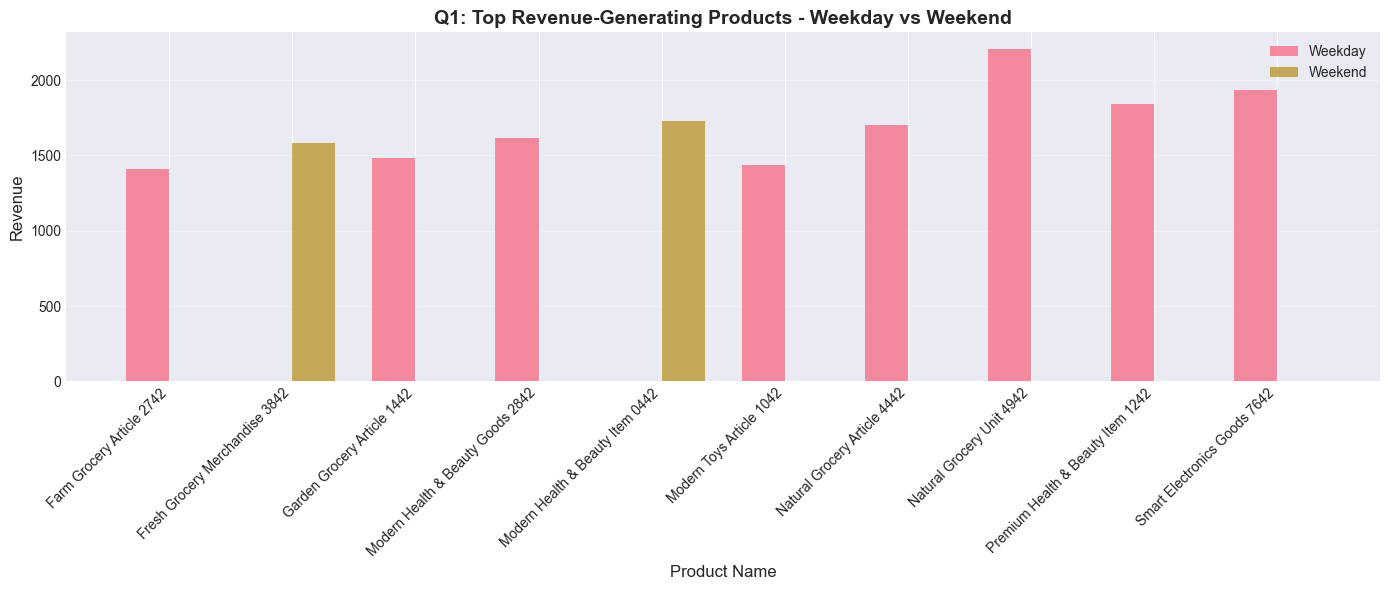

In [18]:
# Q1: Top Revenue-Generating Products on Weekdays and Weekends with Monthly DrillDown
query_idx = 0
q1 = all_queries[query_idx]
print(f"{q1['comment']}")
df1 = execute_query(q1['query'])

print("\nTable:")
print(df1.head(20))

# Visualization: Grouped bar chart
if not df1.empty:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Pivot for better visualization
    pivot_df = df1.pivot_table(values='revenue', index='Product_Name', 
                                columns='day_type', aggfunc='sum', fill_value=0)
    
    x = np.arange(len(pivot_df.index))
    width = 0.35
    
    ax.bar(x - width/2, pivot_df['Weekday'], width, label='Weekday', alpha=0.8)
    ax.bar(x + width/2, pivot_df['Weekend'], width, label='Weekend', alpha=0.8)
    
    ax.set_xlabel('Product Name', fontsize=12)
    ax.set_ylabel('Revenue', fontsize=12)
    ax.set_title('Q1: Top Revenue-Generating Products - Weekday vs Weekend', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df.index, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [20]:
# Q2: Customer Demographics by Purchase Amount with City Category Breakdown
query_idx = 1
q2 = all_queries[query_idx]
print(f"{q2['comment']}")
df2 = execute_query(q2['query'])

print("\nTable:")
df2.head(20)

Q2. Customer Demographics by Purchase Amount with City Category Breakdown

Table:


,Gender,Age,City_Category,total_purchase
0,F,0-17,A,115742.00
1,M,55+,C,757172.98
2,M,26-35,A,4571123.69
3,M,46-50,B,1132068.26
4,F,51-55,A,140153.85
5,M,36-45,B,2926655.82
6,M,26-35,C,3421383.40
7,F,36-45,B,890743.49
8,F,26-35,C,948634.57
9,M,46-50,C,970628.17


In [22]:
# Q3: Product Category Sales by Occupation
query_idx = 2
q3 = all_queries[query_idx]
print(f"{q3['comment']}")
df3 = execute_query(q3['query'])

print("\nTable:")
df3.head(20)

Q3. Product Category Sales by Occupation

Table:


,Occupation,category,total_sales
0,12,Home & Kitchen,96781.37
1,17,Home & Kitchen,121554.04
2,4,Home & Kitchen,265424.05
3,14,Home & Kitchen,61211.25
4,0,Home & Kitchen,215359.77
5,10,Home & Kitchen,85283.50
6,19,Home & Kitchen,20796.39
7,20,Home & Kitchen,99920.09
8,2,Home & Kitchen,77260.02
9,15,Home & Kitchen,34995.32


In [24]:
# Q4: Total Purchases by Gender and Age Group with Quarterly Trend
query_idx = 3
q4 = all_queries[query_idx]
print(f"{q4['comment']}")
df4 = execute_query(q4['query'])

print("\nTable:")
df4.head(20)

Q4. Total Purchases by Gender and Age Group with Quarterly Trend

Table:


,Gender,age_group,Quarter,total_purchase
0,M,51-55,1,96837.44
1,M,18-25,1,254903.93
2,M,36-45,1,270570.05
3,M,46-50,1,109956.91
4,M,26-35,1,564721.87
5,M,55+,1,53663.12
6,F,51-55,1,34631.24
7,F,36-45,1,86735.72
8,M,0-17,1,32935.60
9,F,55+,1,16220.33


Q5. Top Occupations by Product Category Sales

Table:
     category  Occupation total_sales
0  Appliances           0    14478.23
1  Appliances           1    14091.25
2  Appliances           4    12742.12
3  Appliances           7    12668.51
4  Appliances          20     9757.02


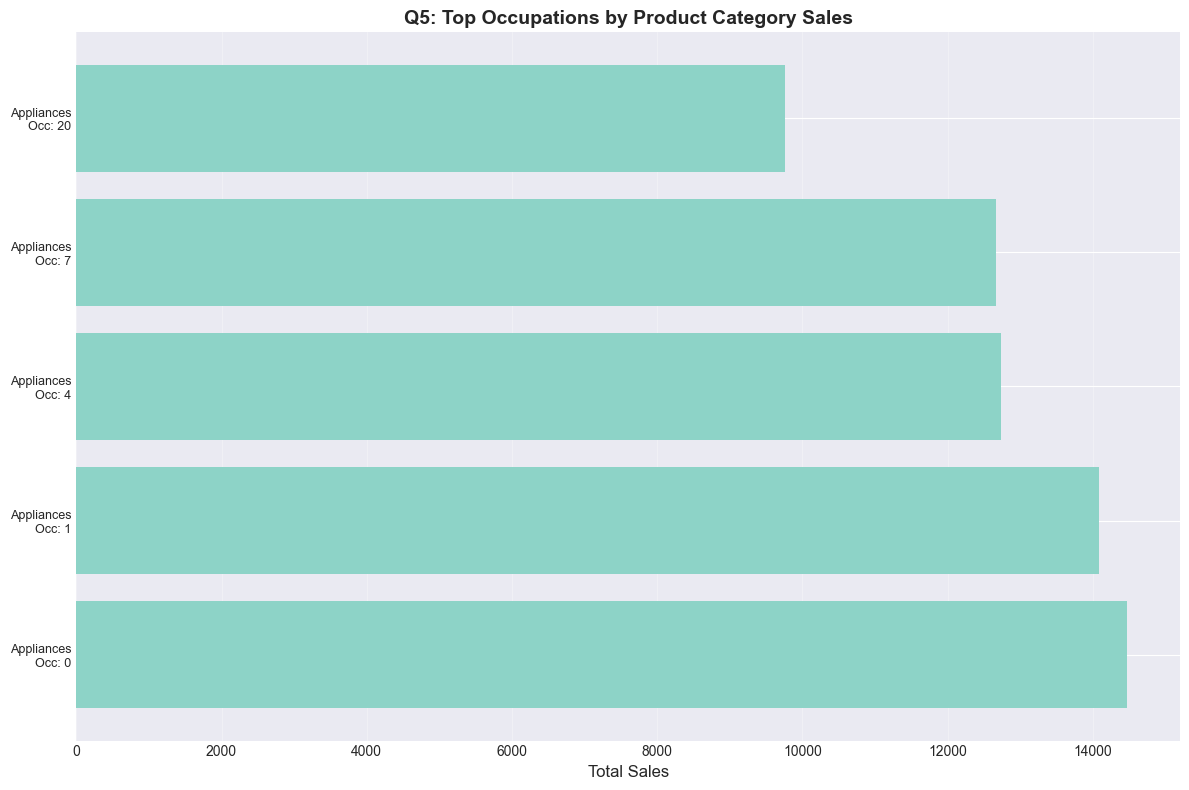

In [25]:
# Q5: Top Occupations by Product Category Sales
query_idx = 4
q5 = all_queries[query_idx]
print(f"{q5['comment']}")
df5 = execute_query(q5['query'])

print("\nTable:")
print(df5.head(20))

# Visualization: Horizontal bar chart
if not df5.empty:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Group by category and show top occupations
    categories = df5['category'].unique()
    colors_map = plt.cm.Set3(np.linspace(0, 1, len(categories)))
    
    y_pos = 0
    y_labels = []
    y_ticks = []
    
    for cat in categories:
        cat_data = df5[df5['category'] == cat].head(5)
        bars = ax.barh(range(y_pos, y_pos + len(cat_data)), 
                      cat_data['total_sales'], 
                      label=cat, color=colors_map[list(categories).index(cat)])
        y_labels.extend([f"{cat}\nOcc: {occ}" for occ in cat_data['Occupation']])
        y_ticks.extend(range(y_pos, y_pos + len(cat_data)))
        y_pos += len(cat_data) + 1
    
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_labels, fontsize=9)
    ax.set_xlabel('Total Sales', fontsize=12)
    ax.set_title('Q5: Top Occupations by Product Category Sales', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


Q6. City Category Performance by Marital Status with Monthly Breakdown

Table:
   City_Category  Marital_Status  Month total_sales
0              B               0      1   943944.30
1              C               0      1   677738.66
2              C               1      1   498304.05
3              B               1      1   643518.84
4              A               0      1   619433.96
5              A               1      1   385940.44
6              B               0      2   850906.19
7              A               0      2   573674.14
8              C               1      2   464899.14
9              C               0      2   610022.92
10             A               1      2   353310.58
11             B               1      2   596197.05
12             A               0      3   626342.92
13             C               0      3   659539.22
14             A               1      3   382044.78
15             B               0      3   935489.24
16             B               1     

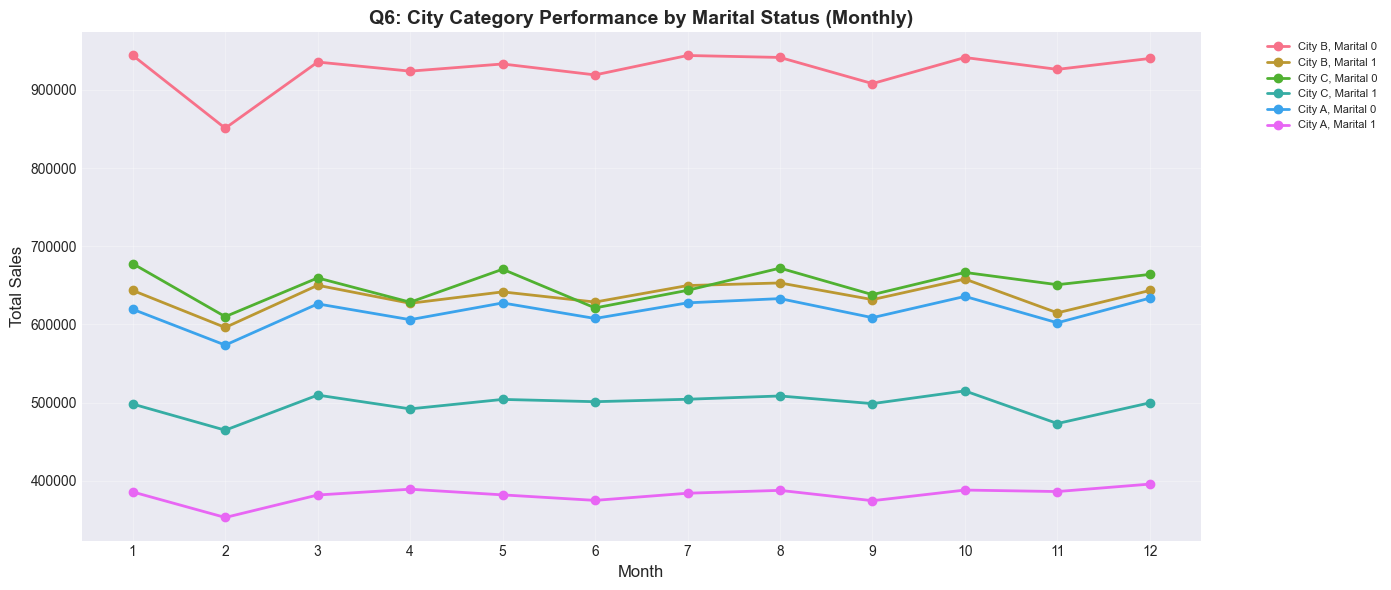

In [27]:
# Q6: City Category Performance by Marital Status with Monthly Breakdown
query_idx = 5
q6 = all_queries[query_idx]
print(f"{q6['comment']}")
df6 = execute_query(q6['query'])

print("\nTable:")
print(df6.head(20))

# Visualization: Multi-line chart
if not df6.empty:
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Create combinations
    for city in df6['City_Category'].unique():
        for marital in df6['Marital_Status'].unique():
            subset = df6[(df6['City_Category'] == city) & (df6['Marital_Status'] == marital)]
            if not subset.empty:
                label = f"City {city}, Marital {marital}"
                ax.plot(subset['Month'], subset['total_sales'], 
                       marker='o', label=label, linewidth=2, markersize=6)
    
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel('Total Sales', fontsize=12)
    ax.set_title('Q6: City Category Performance by Marital Status (Monthly)', 
                fontsize=14, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax.grid(alpha=0.3)
    ax.set_xticks(range(1, 13))
    plt.tight_layout()
    plt.show()


Q7. Average Purchase Amount by Stay Duration and Gender

Table:
  Gender years_in_city avg_purchase
0      F             2    81.672072
1      M             4    81.086717
2      M             3    80.826179
3      M             2    81.051543
4      M             1    80.815852
5      F             1    80.695236
6      M             0    80.947443
7      F             4    79.812402
8      F             0    81.617138
9      F             3    80.791046


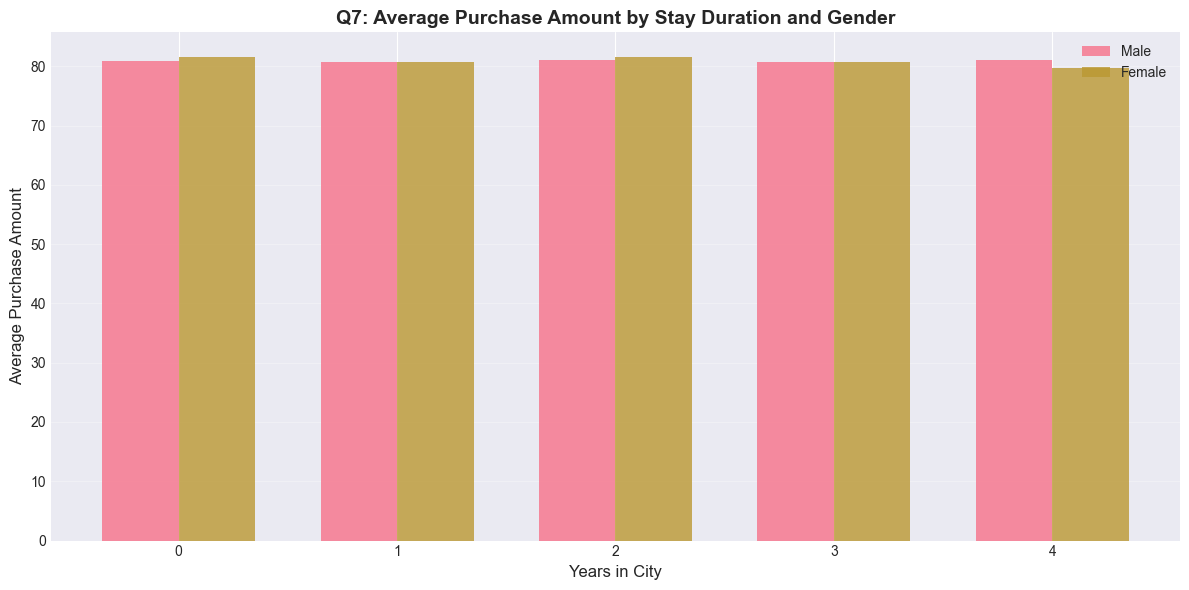

In [28]:
# Q7: Average Purchase Amount by Stay Duration and Gender
query_idx = 6
q7 = all_queries[query_idx]
print(f"{q7['comment']}")
df7 = execute_query(q7['query'])

print("\nTable:")
print(df7.head(20))

# Visualization: Grouped bar chart
if not df7.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    pivot_df = df7.pivot_table(values='avg_purchase', index='years_in_city', 
                              columns='Gender', aggfunc='mean', fill_value=0)
    
    x = np.arange(len(pivot_df.index))
    width = 0.35
    
    ax.bar(x - width/2, pivot_df['M'], width, label='Male', alpha=0.8)
    ax.bar(x + width/2, pivot_df['F'], width, label='Female', alpha=0.8)
    
    ax.set_xlabel('Years in City', fontsize=12)
    ax.set_ylabel('Average Purchase Amount', fontsize=12)
    ax.set_title('Q7: Average Purchase Amount by Stay Duration and Gender', 
                fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df.index)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


Q8. Top 5 Revenue-Generating Cities by Product Category

Table:
  city         category     revenue
0    B  Health & Beauty  5178910.58
1    B          Grocery  4753986.39
2    B             Toys  3822693.15
3    C          Grocery  3755717.06
4    C  Health & Beauty  3586933.75


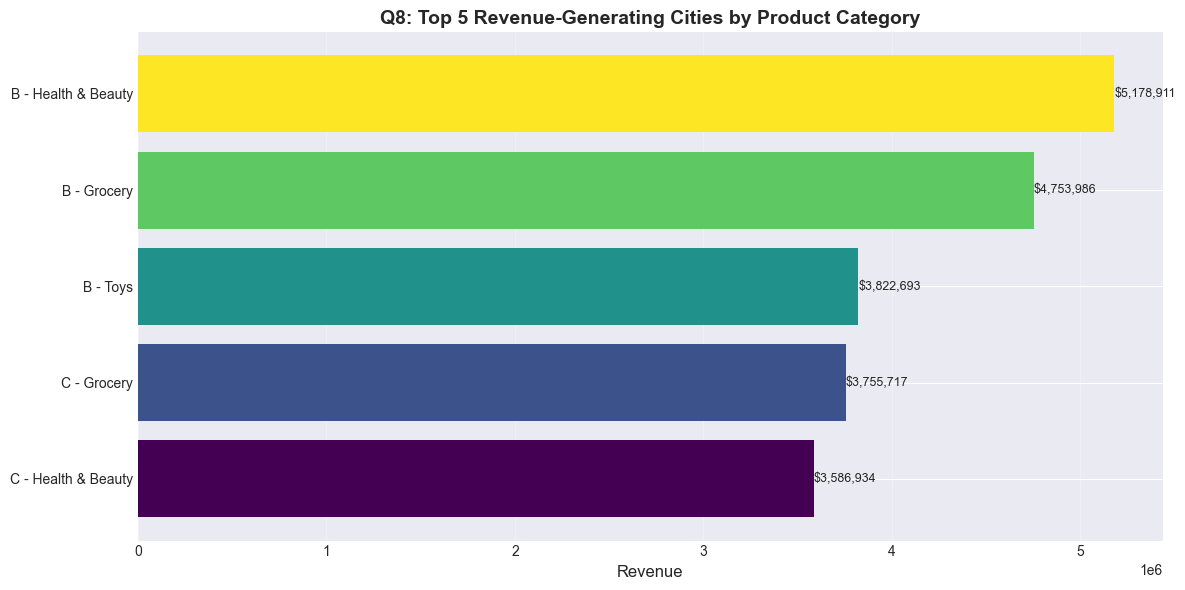

In [29]:
# Q8: Top 5 Revenue-Generating Cities by Product Category
query_idx = 7
q8 = all_queries[query_idx]
print(f"{q8['comment']}")
df8 = execute_query(q8['query'])

print("\nTable:")
print(df8.head(20))

# Visualization: Horizontal bar chart
if not df8.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Sort by revenue
    df8_sorted = df8.sort_values('revenue', ascending=True)
    
    y_pos = np.arange(len(df8_sorted))
    bars = ax.barh(y_pos, df8_sorted['revenue'], 
                  color=plt.cm.viridis(np.linspace(0, 1, len(df8_sorted))))
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels([f"{row['city']} - {row['category']}" 
                        for _, row in df8_sorted.iterrows()])
    ax.set_xlabel('Revenue', fontsize=12)
    ax.set_title('Q8: Top 5 Revenue-Generating Cities by Product Category', 
                fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (idx, row) in enumerate(df8_sorted.iterrows()):
        ax.text(row['revenue'], i, f"${row['revenue']:,.0f}", 
               va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()


Q9. Monthly Sales Growth by Product Category

Table:
                 category  Month   revenue growth_percentage
0              Appliances      1   1553.75              None
1              Appliances      2    936.77        -39.709091
2              Appliances      3   1210.13         29.181122
3              Appliances      4   2171.81         79.469148
4              Appliances      5   2292.36          5.550670
5              Appliances      6   1329.14        -42.018706
6              Appliances      7   1585.16         19.262079
7              Appliances      8   1359.38        -14.243357
8              Appliances      9   1762.44         29.650282
9              Appliances     10   1625.61         -7.763669
10             Appliances     11   1782.32          9.640074
11             Appliances     12   1514.23        -15.041631
12  Arts, Crafts & Sewing      1  11599.81              None
13  Arts, Crafts & Sewing      2   9122.96        -21.352505
14  Arts, Crafts & Sewing      3

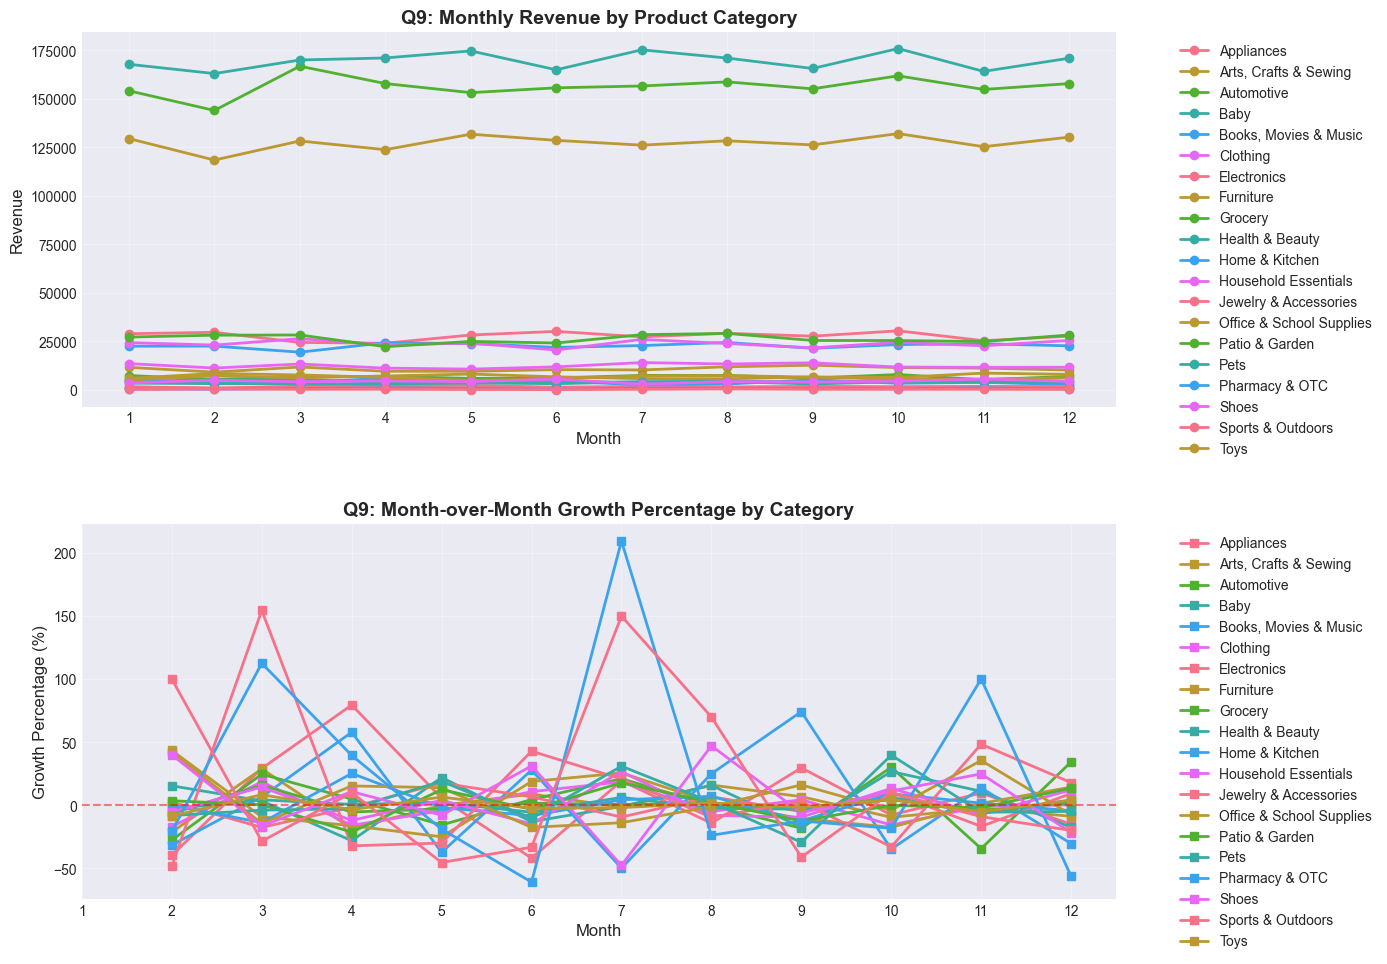

In [30]:
# Q9: Monthly Sales Growth by Product Category
query_idx = 8
q9 = all_queries[query_idx]
print(f"{q9['comment']}")
df9 = execute_query(q9['query'])

print("\nTable:")
print(df9.head(20))

# Visualization: Line chart with growth percentage
if not df9.empty:
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Revenue trend
    for category in df9['category'].unique():
        cat_data = df9[df9['category'] == category].sort_values('Month')
        axes[0].plot(cat_data['Month'], cat_data['revenue'], 
                    marker='o', label=category, linewidth=2, markersize=6)
    
    axes[0].set_xlabel('Month', fontsize=12)
    axes[0].set_ylabel('Revenue', fontsize=12)
    axes[0].set_title('Q9: Monthly Revenue by Product Category', fontsize=14, fontweight='bold')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].grid(alpha=0.3)
    axes[0].set_xticks(range(1, 13))
    
    # Growth percentage
    for category in df9['category'].unique():
        cat_data = df9[df9['category'] == category].sort_values('Month')
        axes[1].plot(cat_data['Month'], cat_data['growth_percentage'], 
                    marker='s', label=category, linewidth=2, markersize=6)
    
    axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[1].set_xlabel('Month', fontsize=12)
    axes[1].set_ylabel('Growth Percentage (%)', fontsize=12)
    axes[1].set_title('Q9: Month-over-Month Growth Percentage by Category', 
                      fontsize=14, fontweight='bold')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].grid(alpha=0.3)
    axes[1].set_xticks(range(1, 13))
    
    plt.tight_layout()
    plt.show()


Q10. Weekend vs. Weekday Sales by Age Group

Table:
   age_group day_type total_sales
0      51-55  Weekday   371765.34
1      18-25  Weekday   971439.29
2      36-45  Weekday  1045425.50
3      46-50  Weekday   443016.89
4      26-35  Weekday  2118215.16
5        55+  Weekday   201157.74
6       0-17  Weekday   143968.55
7      26-35  Weekend   846120.82
8      51-55  Weekend   147723.66
9      36-45  Weekend   417820.15
10     18-25  Weekend   379530.20
11      0-17  Weekend    61560.70
12     46-50  Weekend   178740.30
13       55+  Weekend    81290.86


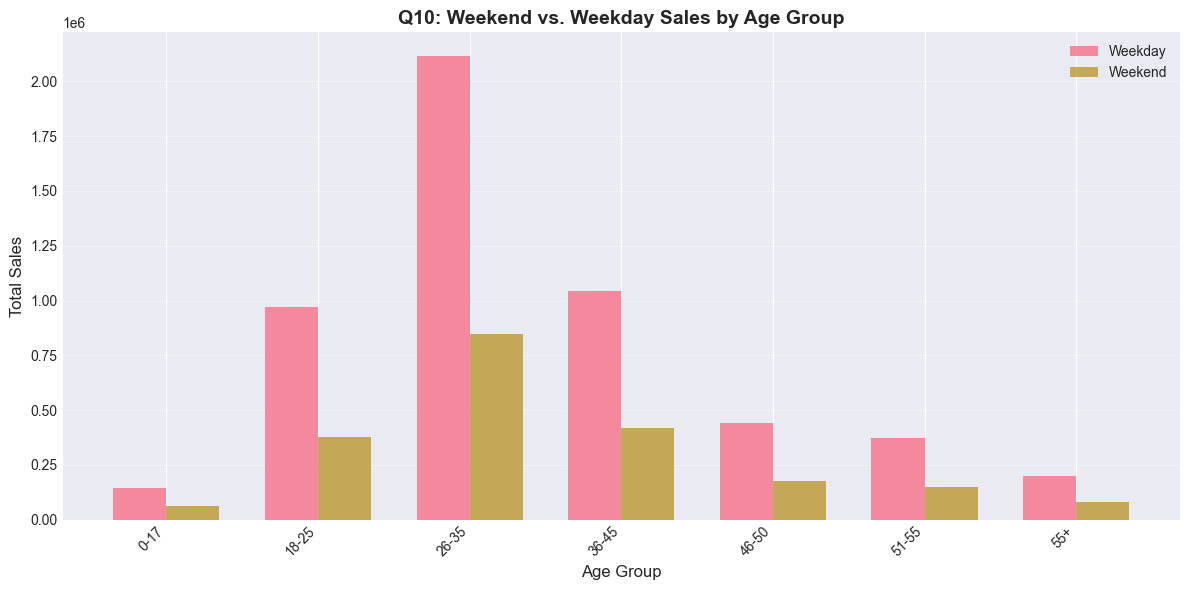

In [31]:
# Q10: Weekend vs. Weekday Sales by Age Group
query_idx = 9
q10 = all_queries[query_idx]
print(f"{q10['comment']}")
df10 = execute_query(q10['query'])

print("\nTable:")
print(df10.head(20))

# Visualization: Grouped bar chart
if not df10.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    pivot_df = df10.pivot_table(values='total_sales', index='age_group', 
                               columns='day_type', aggfunc='sum', fill_value=0)
    
    x = np.arange(len(pivot_df.index))
    width = 0.35
    
    ax.bar(x - width/2, pivot_df['Weekday'], width, label='Weekday', alpha=0.8)
    ax.bar(x + width/2, pivot_df['Weekend'], width, label='Weekend', alpha=0.8)
    
    ax.set_xlabel('Age Group', fontsize=12)
    ax.set_ylabel('Total Sales', fontsize=12)
    ax.set_title('Q10: Weekend vs. Weekday Sales by Age Group', 
                fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_df.index, rotation=45, ha='right')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [33]:
# Q11: Top Revenue-Generating Products on Weekdays and Weekends with Monthly DrillDown
query_idx = 10
q11 = all_queries[query_idx]
print(f"{q11['comment']}")
df11 = execute_query(q11['query'])

print("\nTable:")
df11.head(20)

Q11. Top Revenue-Generating Products on Weekdays and Weekends with Monthly DrillDown

Table:


,Product_Name,Month,day_type,revenue
0,Natural Grocery Unit 4942,5,Weekday,13973.74
1,Organic Grocery Product 0842,7,Weekday,13725.26
2,Organic Grocery Product 0842,5,Weekday,13365.96
3,Organic Grocery Product 0842,11,Weekday,13150.38
4,Classic Household Essentials Article 9442,10,Weekday,13086.45


In [35]:
# Q12: Trend Analysis of Store Revenue Growth Rate Quarterly for 2017
query_idx = 11
q12 = all_queries[query_idx]
print(f"{q12['comment']}")
df12 = execute_query(q12['query'])

print("\nTable:")
df12.head(20)


Q12. Trend Analysis of Store Revenue Growth Rate Quarterly for 2017

Table:


,Store_Name,Quarter,revenue,growth_rate
0,Electro Mart,1,266109.81,None
1,Electro Mart,2,252927.52,-4.953703
2,Electro Mart,3,251342.94,-0.626496
3,Electro Mart,4,266426.90,6.001346
4,Game Zone,1,369516.30,None
5,Game Zone,2,374116.40,1.244898
6,Game Zone,3,376589.49,0.661048
7,Game Zone,4,395890.37,5.125178
8,Health Zone,1,117430.18,None
9,Health Zone,2,117741.63,0.265221


Q13. Detailed Supplier Sales Contribution by Store and Product Name

Table:
      Store_Name     Supplier_Name  \
0   Electro Mart  Sony Corporation   
1   Electro Mart  Sony Corporation   
2   Electro Mart  Sony Corporation   
3   Electro Mart  Sony Corporation   
4   Electro Mart  Sony Corporation   
5   Electro Mart  Sony Corporation   
6   Electro Mart  Sony Corporation   
7   Electro Mart  Sony Corporation   
8   Electro Mart  Sony Corporation   
9   Electro Mart  Sony Corporation   
10  Electro Mart  Sony Corporation   
11  Electro Mart  Sony Corporation   
12  Electro Mart  Sony Corporation   
13  Electro Mart  Sony Corporation   
14  Electro Mart  Sony Corporation   
15  Electro Mart  Sony Corporation   
16  Electro Mart  Sony Corporation   
17  Electro Mart  Sony Corporation   
18  Electro Mart  Sony Corporation   
19  Electro Mart  Sony Corporation   
20  Electro Mart  Sony Corporation   
21  Electro Mart  Sony Corporation   
22  Electro Mart  Sony Corporation   
23  Electro 

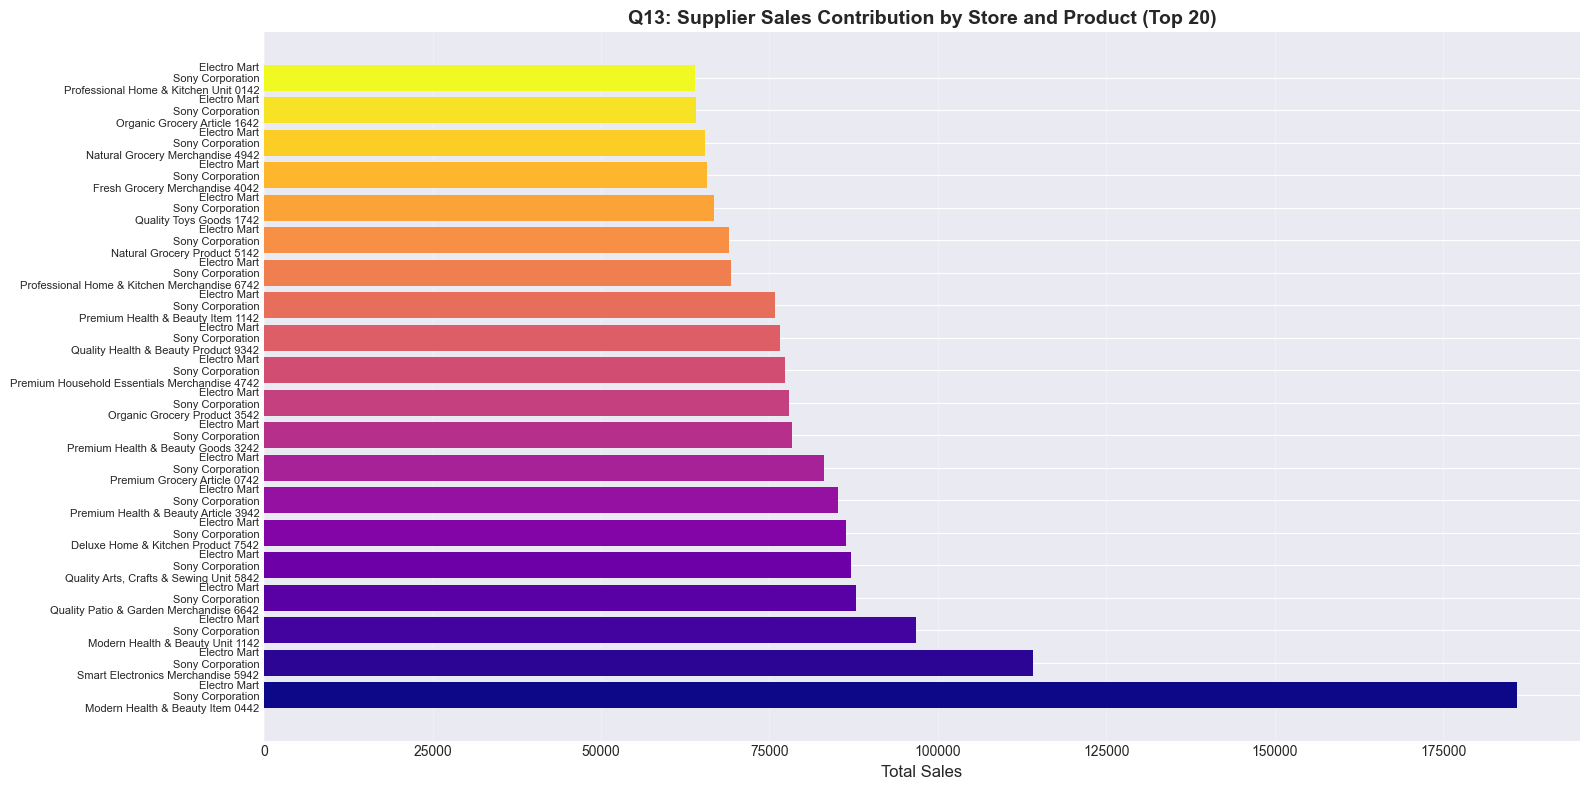

In [37]:
# Q13: Detailed Supplier Sales Contribution by Store and Product Name
query_idx = 12
q13 = all_queries[query_idx]
print(f"{q13['comment']}")
df13 = execute_query(q13['query'])

print("\nTable:")
print(df13.head(30))

# Visualization: Horizontal bar chart
if not df13.empty:
    # Top 20 combinations for visualization
    df13_top = df13.head(20)
    
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Create labels
    labels = [f"{row['Store_Name']}\n{row['Supplier_Name']}\n{row['Product_Name']}" 
             for _, row in df13_top.iterrows()]
    
    bars = ax.barh(range(len(df13_top)), df13_top['total_sales'], 
                  color=plt.cm.plasma(np.linspace(0, 1, len(df13_top))))
    
    ax.set_yticks(range(len(df13_top)))
    ax.set_yticklabels(labels, fontsize=8)
    ax.set_xlabel('Total Sales', fontsize=12)
    ax.set_title('Q13: Supplier Sales Contribution by Store and Product (Top 20)', 
                fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [39]:
# Q14: Seasonal Analysis of Product Sales Using Dynamic Drill-Down
query_idx = 13
q14 = all_queries[query_idx]
print(f"{q14['comment']}")
df14 = execute_query(q14['query'])

print("\nTable:")
df14.head(30)

Q14. Seasonal Analysis of Product Sales Using Dynamic Drill-Down

Table:


,Product_Name,Season,total_sales
0,Classic Home & Kitchen Article 0142,Winter,15373.40
1,Classic Home & Kitchen Article 0142,Spring,15262.20
2,Classic Home & Kitchen Article 0142,Summer,17263.80
3,Classic Home & Kitchen Article 0142,Fall,16235.20
4,Ultra Electronics Item 0242,Spring,8455.24
5,Ultra Electronics Item 0242,Summer,7940.20
6,Ultra Electronics Item 0242,Fall,7468.08
7,Ultra Electronics Item 0242,Winter,8755.68
8,Modern Health & Beauty Product 0342,Winter,13036.01
9,Modern Health & Beauty Product 0342,Spring,11706.87


In [41]:
# Q15: Store-Wise and Supplier-Wise Monthly Revenue Volatility
query_idx = 14
q15 = all_queries[query_idx]
print(f"{q15['comment']}")
df15 = execute_query(q15['query'])

print("\nTable:")
df15.head(30)

Q15. Store-Wise and Supplier-Wise Monthly Revenue Volatility

Table:


,Store_Name,Supplier_Name,Month,revenue,volatility_percentage
0,Electro Mart,Sony Corporation,1,520569.11,None
1,Electro Mart,Sony Corporation,2,485699.47,-6.698369
2,Electro Mart,Sony Corporation,3,522249.43,7.525221
3,Electro Mart,Sony Corporation,4,517186.60,-0.969428
4,Electro Mart,Sony Corporation,5,511590.75,-1.081979
5,Electro Mart,Sony Corporation,6,497656.47,-2.723716
6,Electro Mart,Sony Corporation,7,516625.50,3.811672
7,Electro Mart,Sony Corporation,8,534775.69,3.513220
8,Electro Mart,Sony Corporation,9,508791.83,-4.858833
9,Electro Mart,Sony Corporation,10,532770.21,4.712808


Q16. Top 5 Products Purchased Together by Same Customer (Product Affinity Analysis)

Table:
                                       product_A  \
0               Natural Grocery Merchandise 4042   
1                   Designer Clothing Goods 2642   
2            Premium Patio & Garden Product 5042   
3  Premium Household Essentials Merchandise 4742   
4            Classic Home & Kitchen Article 0142   

                              product_B  customer_count  frequency  
0          Organic Grocery Product 4042               3          3  
1             Premium Toys Product 9542               3          3  
2  Classic Health & Beauty Product 8942               3          3  
3      Organic Grocery Merchandise 0042               3          3  
4     Premium Home & Kitchen Goods 8242               2          2  


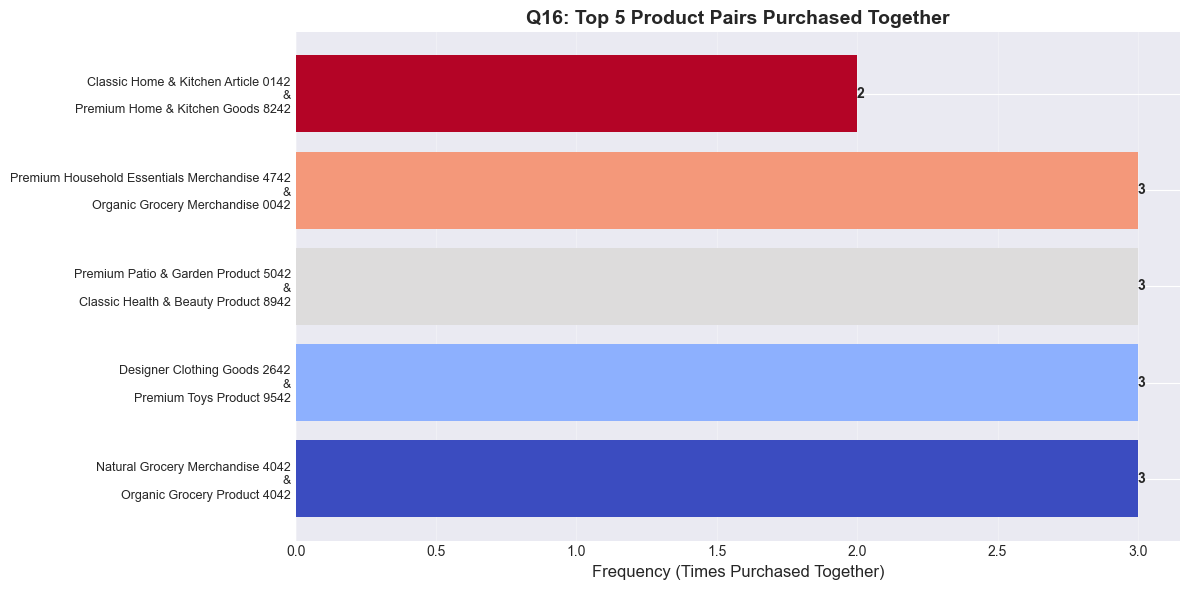

In [46]:
# Q16: Top 5 Products Purchased Together (Product Affinity Analysis)
query_idx = 15
q16 = all_queries[query_idx]
print(f"{q16['comment']}")
df16 = execute_query(q16['query'])

print("\nTable:")
print(df16.head(20))

# Visualization: Horizontal bar chart
if not df16.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create combination labels
    labels = [f"{row['product_A']}\n&\n{row['product_B']}" 
             for _, row in df16.iterrows()]
    
    bars = ax.barh(range(len(df16)), df16['frequency'], 
                  color=plt.cm.coolwarm(np.linspace(0, 1, len(df16))))
    
    ax.set_yticks(range(len(df16)))
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_xlabel('Frequency (Times Purchased Together)', fontsize=12)
    ax.set_title('Q16: Top 5 Product Pairs Purchased Together', 
                fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (idx, row) in enumerate(df16.iterrows()):
        ax.text(row['frequency'], i, f"{int(row['frequency'])}", 
               va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


In [48]:
# Q17: Yearly Revenue Trends by Store, Supplier, and Product with ROLLUP
query_idx = 16
q17 = all_queries[query_idx]
print(f"{q17['comment']}")
df17 = execute_query(q17['query'])

print("\nTable:")
df17.head(30)

Q17. Yearly Revenue Trends by Store, Supplier, and Product with ROLLUP

Table:


,Store_Name,Supplier_Name,Product_Name,total_revenue
0,Electro Mart,Sony Corporation,Advanced Electronics Article 6042,824.32
1,Electro Mart,Sony Corporation,Advanced Electronics Item 3542,646.72
2,Electro Mart,Sony Corporation,Classic Appliances Item 1642,4223.45
3,Electro Mart,Sony Corporation,Classic Appliances Unit 8742,5862.24
4,Electro Mart,Sony Corporation,"Classic Arts, Crafts & Sewing Article 6942",6195.20
5,Electro Mart,Sony Corporation,"Classic Arts, Crafts & Sewing Merchandise 2342",7411.04
6,Electro Mart,Sony Corporation,Classic Baby Item 8642,2374.20
7,Electro Mart,Sony Corporation,Classic Baby Product 1242,7204.69
8,Electro Mart,Sony Corporation,Classic Baby Unit 1442,7761.18
9,Electro Mart,Sony Corporation,Classic Baby Unit 4342,10780.98


In [50]:
# Q18: Revenue and Volume-Based Sales Analysis for Each Product (H1 and H2)
query_idx = 17
q18 = all_queries[query_idx]
print(f"{q18['comment']}")
df18 = execute_query(q18['query'])

print("\nTable:")
df18.head(20)

Q18. Revenue and Volume-Based Sales Analysis for Each Product for H1 and H2

Table:


,Product_Name,revenue_h1,revenue_h2,revenue_total,qty_h1,qty_h2,qty_total
0,Classic Home & Kitchen Article 0142,30719.00,33415.60,64134.60,1105,1202,2307
1,Ultra Electronics Item 0242,16738.80,15880.40,32619.20,390,370,760
2,Modern Health & Beauty Product 0342,22996.62,27479.58,50476.20,347,413,760
3,Modern Health & Beauty Item 0442,89076.70,96946.34,186023.04,1312,1401,2713
4,Classic Health & Beauty Item 0542,3558.73,4527.24,8085.97,217,276,493
5,Premium Grocery Goods 0642,17197.68,16278.72,33476.40,524,496,1020
6,Premium Health & Beauty Item 0742,8455.64,7036.08,15491.72,274,228,502
7,Digital Electronics Product 0842,1400.00,1793.75,3193.75,32,41,73
8,Premium Grocery Article 0942,2177.77,2506.49,4684.26,53,61,114
9,Garden Grocery Goods 1042,21006.72,19393.92,40400.64,521,481,1002


In [52]:
# Q19: Identify High Revenue Spikes in Product Sales (Outlier Detection)
query_idx = 18
q19 = all_queries[query_idx]
print(f"{q19['comment']}")
df19 = execute_query(q19['query'])

print("\nTable:")
df19.head(30)

Q19. Identify High Revenue Spikes in Product Sales and Highlight Outliers

Table:


,Product_Name,date,daily_sales,avg_sales,anomaly_flag
0,Advanced Electronics Article 6042,2015-11-28,103.04,91.591111,Normal
1,Advanced Electronics Article 6042,2016-01-06,51.52,91.591111,Normal
2,Advanced Electronics Article 6042,2016-03-28,103.04,91.591111,Normal
3,Advanced Electronics Article 6042,2016-08-13,51.52,91.591111,Normal
4,Advanced Electronics Article 6042,2017-03-31,103.04,91.591111,Normal
5,Advanced Electronics Article 6042,2019-05-26,51.52,91.591111,Normal
6,Advanced Electronics Article 6042,2019-09-29,154.56,91.591111,Normal
7,Advanced Electronics Article 6042,2020-01-26,51.52,91.591111,Normal
8,Advanced Electronics Article 6042,2020-08-24,154.56,91.591111,Normal
9,Advanced Electronics Article 6442,2015-08-09,65.94,41.423846,Normal


In [54]:
# Q20: Create View STORE_QUARTERLY_SALES (Execute and Query)
query_idx = 19
q20 = all_queries[query_idx]
print(f" {q20['comment']}")

# Execute the CREATE VIEW statement
print("View created successfully!")
# Query the view
df20 = execute_query("SELECT * FROM STORE_QUARTERLY_SALES LIMIT 50")

print("\nTable (from view):")
df20.head(50)


 Q20. Create a View STORE_QUARTERLY_SALES for Optimized Sales Analysis
View created successfully!

Table (from view):


,Store_Name,Year,Quarter,quarterly_sales
0,Electro Mart,2015,1,253146.39
1,Electro Mart,2015,2,252884.22
2,Electro Mart,2015,3,260747.01
3,Electro Mart,2015,4,265966.55
4,Electro Mart,2016,1,257007.60
5,Electro Mart,2016,2,256755.96
6,Electro Mart,2016,3,264720.63
7,Electro Mart,2016,4,258873.43
8,Electro Mart,2017,1,266109.81
9,Electro Mart,2017,2,252927.52


In [55]:
# Close database connection
conn.close()
print("Database connection closed.")
print("\n" + "="*60)
print("All 20 queries executed and visualized successfully!")
print("="*60)

Database connection closed.

All 20 queries executed and visualized successfully!
